## Calculate inter-rater agreement for continuous ratings

Zizhuang Miao

This script finds the interrater agreement of the continuous ratings by two indices: pairwise correlations and split-half correlations. It also calculates the variance of ratings across time to see how much they fluctuated.

### Pairwise correlation for continuous ratings

#### Social interactions

In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt

dataDir = 'C:\\'
outputDir = 'C:\\'

In [2]:
allData_social = pd.DataFrame()
lastTimePoint = []

# get all data concatenated
for n in range(1,9):
    for s in range(1,10):
        trialData = pd.read_csv(join(dataDir, "continuous_social_1a2a3a4a_long", f"narrative{n}situation{s}.csv"))
        if not (n == 1 and s == 1):
            trialData['time'] += 0.23
            trialData['time'] += lastTimePoint[-1]
        lastTimePoint.append(trialData.iloc[-1, 1])
        allData_social = pd.concat([allData_social, trialData], ignore_index=True)

# exclude bad data
badData = pd.read_csv("C:\\")
for sub in badData['ID']:
    allData_social = allData_social.loc[allData_social['ID']!= sub]
allData_social = allData_social.reset_index(drop=True)

subList = list(np.unique(allData_social['ID']))

# calculate correlations
# make a dataframe for pairwise correlations
corr = pd.DataFrame(columns=subList, index=subList)

for i, sub in enumerate(subList):
    sub1Data = allData_social.loc[allData_social['ID']==sub, ['time', 'rating']]
    for j in range(i+1, len(subList)):
        sub2Data = allData_social.loc[allData_social['ID']==subList[j], ['time', 'rating']]
        sub2Data.columns = ['time', 'rating2']
        corrData = pd.merge(sub1Data, sub2Data, on='time')
        corr.loc[sub, subList[j]] = corrData['rating'].corr(corrData['rating2'])

corr.to_csv(join(outputDir, 'pairwise-corr_social_con.csv'), index=False)

In [3]:
# visualization
correlation = pd.read_csv(join(outputDir, 'pairwise-corr_social_con.csv'))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

In [7]:
# find the 2.5th and 97.5th percentiles in correlation values
lower = correlation.values.flatten()
lower = lower[~np.isnan(lower)]
lower_percentile = np.percentile(lower, 4.5)
upper_percentile = np.percentile(lower, 95)
print(lower_percentile, upper_percentile)

0.004315104523866527 0.6651336027301131


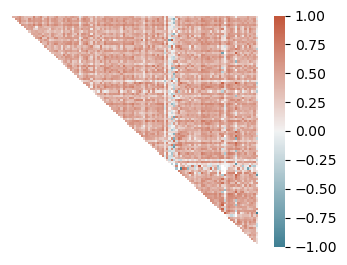

In [5]:
plt.figure(figsize=(4,3))
sns.heatmap(correlation, cmap=cmap, vmax=1, vmin=-1, mask=correlation.isnull(), fmt=".2f", xticklabels=[], yticklabels=[])
plt.savefig('C:\\')

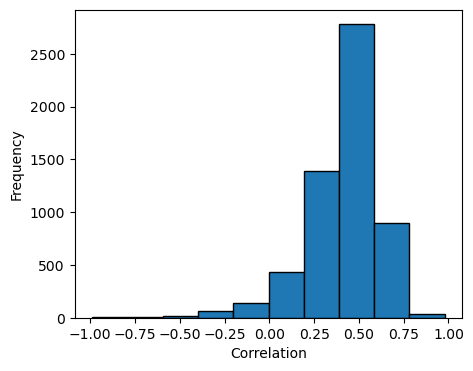

In [6]:
plt.figure(figsize=(5,4))
plt.hist(correlation.values.flatten(), edgecolor='black')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.savefig('C:\\')

In [7]:
correlation.median().median()

0.4677480272659536

#### Theory of mind

In [1]:
import pandas as pd
import numpy as np
import os
from os.path import join

dataDir = 'C:\\'
outputDir = 'C:\\'

allData_tom = pd.DataFrame()
lastTimePoint = []

# get all data concatenated
for n in range(1,9):
    for s in range(1,10):
        trialData = pd.read_csv(join(dataDir, "continuous_tom_1a2a3a4a_long", f"narrative{n}situation{s}.csv"))
        if not (n == 1 and s == 1):
            trialData['time'] += 0.23
            trialData['time'] += lastTimePoint[-1]
        lastTimePoint.append(trialData.iloc[-1, 1])
        allData_tom = pd.concat([allData_tom, trialData], ignore_index=True)

# exclude bad data
badData = pd.read_csv("C:\\")
for sub in badData['ID']:
    allData_tom = allData_tom.loc[allData_tom['ID']!= sub]
allData_tom = allData_tom.reset_index(drop=True)

subList = list(np.unique(allData_tom['ID']))

# calculate correlations
# make a dataframe for pairwise correlations
corr = pd.DataFrame(columns=subList, index=subList)

for i, sub in enumerate(subList):
    sub1Data = allData_tom.loc[allData_tom['ID']==sub, ['time', 'rating']]
    for j in range(i+1, len(subList)):
        sub2Data = allData_tom.loc[allData_tom['ID']==subList[j], ['time', 'rating']]
        sub2Data.columns = ['time', 'rating2']
        corrData = pd.merge(sub1Data, sub2Data, on='time')
        corr.loc[sub, subList[j]] = corrData['rating'].corr(corrData['rating2'])

corr = corr.fillna(0)
for i, sub in enumerate(subList):
    for j in range(0, i+1):
        corr.loc[sub, subList[j]] = np.nan
corr.to_csv(join(outputDir, 'pairwise-corr_tom_con.csv'), index=False)

In [2]:
import seaborn as sns
# visualization
outputDir = 'C:\\'

correlation = pd.read_csv(join(outputDir, 'pairwise-corr_tom_con.csv'))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

In [8]:
# find the 2.5th and 97.5th percentiles in correlation values
lower = correlation.values.flatten()
lower = lower[~np.isnan(lower)]
lower_percentile = np.percentile(lower, 20)
upper_percentile = np.percentile(lower, 95)
print(lower_percentile, upper_percentile)
print(np.median(lower))

0.0 0.5310687555990491
0.2112896847535119


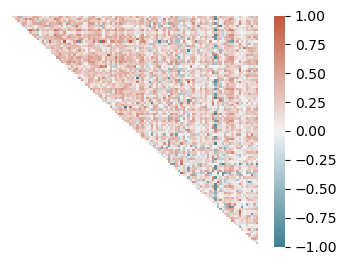

In [10]:
plt.figure(figsize=(4,3))
sns.heatmap(correlation, cmap=cmap, vmax=1, vmin=-1, mask=correlation.isnull(), fmt=".2f", xticklabels=[], yticklabels=[])
plt.savefig('C:\\')

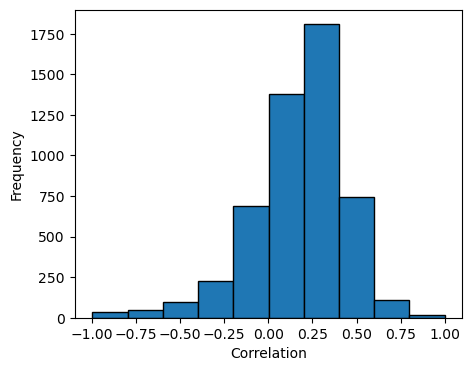

In [11]:
plt.figure(figsize=(5,4))
plt.hist(correlation.values.flatten(), edgecolor='black')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.savefig('C:\\')

In [11]:
corr = correlation.values.flatten()
corr = corr[np.isfinite(corr)]
print(np.median(corr))
#np.median(corr)
print(corr.min(), corr.max())

0.2112896847535119
-0.9979177183653696 1.0


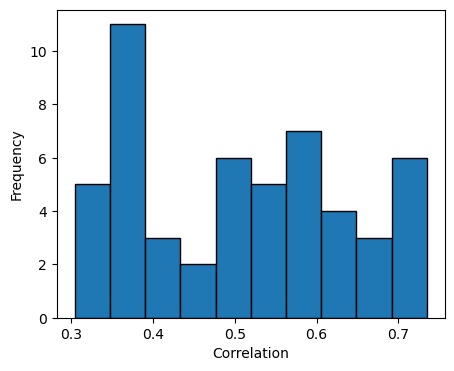

In [13]:
corr_with_group = pd.read_csv(os.path.join(outputDir, 'corr-with-group_tom_con.csv'))

badData = pd.read_csv("C:\\")
for sub in badData['ID']:
    corr_with_group = corr_with_group.loc[corr_with_group['ID']!= sub]
corr_with_group = corr_with_group.reset_index(drop=True)

plt.figure(figsize=(5,4))
plt.hist(corr_with_group['corr_mean'], edgecolor='black')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.savefig('C:\\')

In [22]:
print(corr_with_group['corr_mean'].min(), corr_with_group['corr_mean'].max(), corr_with_group['corr_mean'].mean(), corr_with_group['corr_mean'].median())

0.3041021688897617 0.7350304911744716 0.5060420700278018 0.5037084182202141


### Variance across time

In [5]:
import pandas as pd
import numpy as np
import os
from os.path import join

dataDir = 'C:\\'

allData_tom = pd.DataFrame()
lastTimePoint = []

# get all data concatenated
for n in range(1,9):
    for s in range(1,10):
        trialData = pd.read_csv(join(dataDir, "continuous_social_1a2a3a4a_long", f"narrative{n}situation{s}.csv"))
        if not (n == 1 and s == 1):
            trialData['time'] += 0.23
            trialData['time'] += lastTimePoint[-1]
        lastTimePoint.append(trialData.iloc[-1, 1])
        allData_tom = pd.concat([allData_tom, trialData], ignore_index=True)

# exclude bad data
badData = pd.read_csv("C:\\")
for sub in badData['ID']:
    allData_tom = allData_tom.loc[allData_tom['ID']!= sub]
allData_tom = allData_tom.reset_index(drop=True)

subList = list(np.unique(allData_tom['ID']))

# calculate std
std = []

for i, sub in enumerate(subList):
    subData = allData_tom.loc[allData_tom['ID']==sub, ['rating']]
    std.append(subData['rating'].std())

print(std)
print(np.mean(std))

[28.827277502452137, 25.72340988709005, 30.901902424937756, 32.2453853853629, 23.213978295553453, 40.65069347187867, 42.85611116950622, 36.7245527604975, 23.497716798856533, 39.99747377272753, 33.28756140818409, 36.248148805326565, 32.77921762597465, 38.09208366311102, 31.675453793635615, 31.29525427024158, 34.83921568071915, 8.540930524290914, 34.40598727256399, 44.43875839851303, 30.60099553890574, 19.29427758589079, 39.34268759925917, 39.979912018239204, 33.4462113013935, 39.67411045723815, 33.65857044212255, 31.770636838284037, 42.35692715782357, 32.25042794869678, 29.737619618119357, 35.68504374874277, 39.00123939734121, 35.397723929657175, 40.14327635553019, 27.297582002899347, 34.804180187826454, 19.955133303456865, 33.849020973844304, 35.36065391782529, 37.70211586849348, 38.88159836654226, 30.704413902480454, 34.500369085939816, 32.7373420073432, 38.3888369730684, 40.1496302948508, 37.76837069751907, 21.78528021722103, 30.70075153941149, 34.29562803539964, 41.422810266159054, 

### Split-half correlations

In [14]:
import pandas as pd
import numpy as np
import os
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt

#### Social interactions

In [15]:
dataDir = 'C:\\'
outputDir = 'C:\\'

allData_social = pd.DataFrame()
lastTimePoint = []

# get all data concatenated
for n in range(1,9):
    for s in range(1,10):
        trialData = pd.read_csv(join(dataDir, "continuous_social_1a2a3a4a_long", f"narrative{n}situation{s}.csv"))
        if not (n == 1 and s == 1):
            trialData['time'] += 0.23
            trialData['time'] += lastTimePoint[-1]
        lastTimePoint.append(trialData.iloc[-1, 1])
        allData_social = pd.concat([allData_social, trialData], ignore_index=True)

# exclude bad data
badData = pd.read_csv("C:\\")
for sub in badData['ID']:
    allData_social = allData_social.loc[allData_social['ID']!= sub]
allData_social = allData_social.reset_index(drop=True)

# save social data for further analysis to dataDir
allData_social.to_csv(join(dataDir, "continuous_social_1a2a3a4a_long", 'allNarratives_social.csv'), index=False)

subList = list(np.unique(allData_social['ID']))

# Create an empty dataframe to store the correlations
correlation_df = pd.DataFrame(columns=['Repetition', 'Split-half Correlation'])

# Repeat the process 2000 times
# Repeat for 10 times for testing
for repetition in range(2000):
    np.random.shuffle(subList)
    group1 = subList[:len(subList)//2]
    group2 = subList[len(subList)//2:]

    group1_mean = allData_social[allData_social['ID'].isin(group1)].groupby('time')['rating'].mean()
    group2_mean = allData_social[allData_social['ID'].isin(group2)].groupby('time')['rating'].mean()

    split_half_corr = group1_mean.corr(group2_mean)
    
    corr_corrected = (2 * split_half_corr) / (1 + split_half_corr)    # Spearman-Brown correction

    correlation_df = pd.concat([correlation_df, pd.DataFrame({'Repetition': repetition+1, 
                                                              'Split-half Correlation': split_half_corr, 
                                                              "Corrected Correlation": corr_corrected}, index=[repetition])], ignore_index=True)

# Print the dataframe
print(correlation_df.head())

  Repetition  Split-half Correlation  Corrected Correlation
0          1                0.950978               0.974873
1          2                0.967426               0.983443
2          3                0.958360               0.978738
3          4                0.962155               0.980712
4          5                0.963482               0.981401


In [16]:
correlation_df.to_csv(join(outputDir, 'stats', 'splithalf-corr_social_con_permutation2000.csv'), index=False)

Mean correlation: 0.9586627130604432
Mean corrected correlation: 0.9788893212868913
Min correlation: 0.962
 Max correlation: 0.985


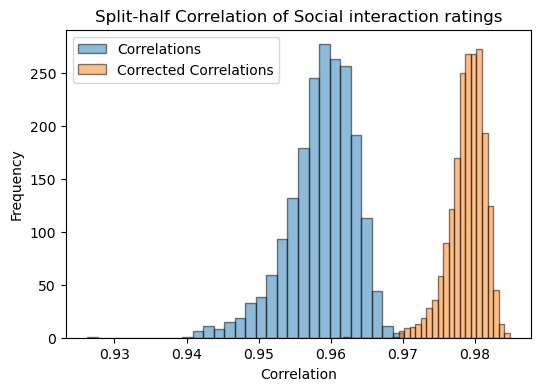

In [19]:
mean_corr = correlation_df['Split-half Correlation'].mean()
print(f"Mean correlation: {mean_corr}")
mean_corr_corrected = correlation_df['Corrected Correlation'].mean()
print(f"Mean corrected correlation: {mean_corr_corrected}")

correlation_values = correlation_df['Split-half Correlation'].values
correlation_values_corrected = correlation_df['Corrected Correlation'].values
print(f"Min correlation: {correlation_values_corrected.min():.3f}\n Max correlation: {correlation_values_corrected.max():.3f}")


plt.figure(figsize=(6, 4))
plt.hist(correlation_values, bins=30, edgecolor='black', alpha=0.5, label='Correlations')
plt.hist(correlation_values_corrected, bins=30, edgecolor='black', alpha=0.5, label='Corrected Correlations')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Split-half Correlation of Social interaction ratings')
plt.legend()
plt.savefig(join(outputDir, 'figures', 'splithalf-corr_social_con_permutation2000-hist.svg'))
plt.show()


#### Theory of mind

In [20]:
dataDir = 'C:\\'
outputDir = 'C:\\'

allData_tom = pd.DataFrame()
lastTimePoint = []

# get all data concatenated
for n in range(1,9):
    for s in range(1,10):
        trialData = pd.read_csv(join(dataDir, "continuous_tom_1a2a3a4a_long", f"narrative{n}situation{s}.csv"))
        if not (n == 1 and s == 1):
            trialData['time'] += 0.23
            trialData['time'] += lastTimePoint[-1]
        lastTimePoint.append(trialData.iloc[-1, 1])
        allData_tom = pd.concat([allData_tom, trialData], ignore_index=True)

# exclude bad data
badData = pd.read_csv("C:\\")
for sub in badData['ID']:
    allData_tom = allData_tom.loc[allData_tom['ID']!= sub]
allData_tom = allData_tom.reset_index(drop=True)

# save tom data for further analysis to dataDir
allData_tom.to_csv(join(dataDir, "continuous_tom_1a2a3a4a_long", 'allNarratives_tom.csv'), index=False)

subList = list(np.unique(allData_tom['ID']))

# Create an empty dataframe to store the correlations
correlation_df = pd.DataFrame(columns=['Repetition', 'Split-half Correlation'])

# Repeat the process 2000 times
# Repeat for 10 times for testing
for repetition in range(2000):
    np.random.shuffle(subList)
    group1 = subList[:len(subList)//2]
    group2 = subList[len(subList)//2:]

    group1_mean = allData_tom[allData_tom['ID'].isin(group1)].groupby('time')['rating'].mean()
    group2_mean = allData_tom[allData_tom['ID'].isin(group2)].groupby('time')['rating'].mean()

    split_half_corr = group1_mean.corr(group2_mean)
    
    corr_corrected = (2 * split_half_corr) / (1 + split_half_corr)    # Spearman-Brown correction

    correlation_df = pd.concat([correlation_df, pd.DataFrame({'Repetition': repetition+1, 
                                                              'Split-half Correlation': split_half_corr, 
                                                              "Corrected Correlation": corr_corrected}, index=[repetition])], ignore_index=True)

# Print the dataframe
print(correlation_df.head())

  Repetition  Split-half Correlation  Corrected Correlation
0          1                0.848705               0.918161
1          2                0.840272               0.913204
2          3                0.859644               0.924525
3          4                0.855545               0.922150
4          5                0.815178               0.898180


In [21]:
correlation_df.to_csv(join(outputDir, 'stats', 'splithalf-corr_tom_con_permutation2000.csv'), index=False)

Mean correlation: 0.8437208286585828
Mean corrected correlation: 0.915149534146975
Min correlation: 0.864
 Max correlation: 0.945


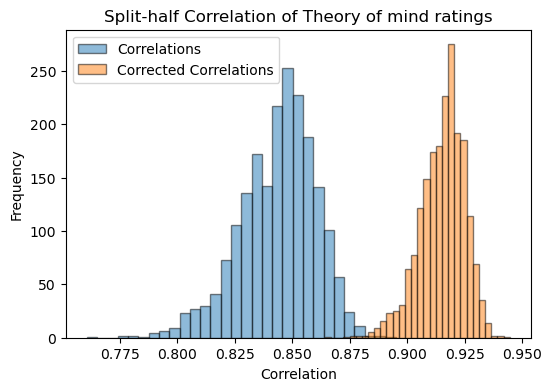

In [22]:
mean_corr = correlation_df['Split-half Correlation'].mean()
print(f"Mean correlation: {mean_corr}")
mean_corr_corrected = correlation_df['Corrected Correlation'].mean()
print(f"Mean corrected correlation: {mean_corr_corrected}")

correlation_values = correlation_df['Split-half Correlation'].values
correlation_values_corrected = correlation_df['Corrected Correlation'].values
print(f"Min correlation: {correlation_values_corrected.min():.3f}\n Max correlation: {correlation_values_corrected.max():.3f}")


plt.figure(figsize=(6, 4))
plt.hist(correlation_values, bins=30, edgecolor='black', alpha=0.5, label='Correlations')
plt.hist(correlation_values_corrected, bins=30, edgecolor='black', alpha=0.5, label='Corrected Correlations')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.title('Split-half Correlation of Theory of mind ratings')
plt.legend()
plt.savefig(join(outputDir, 'figures', 'splithalf-corr_tom_con_permutation2000-hist.svg'))
plt.show()